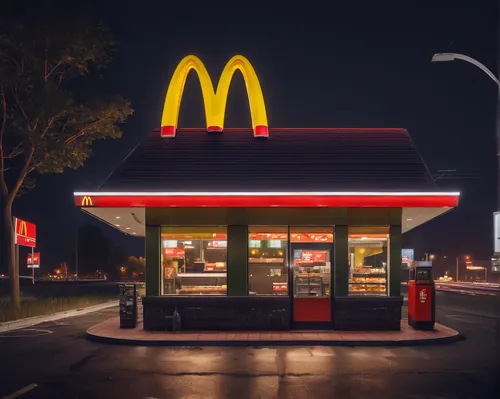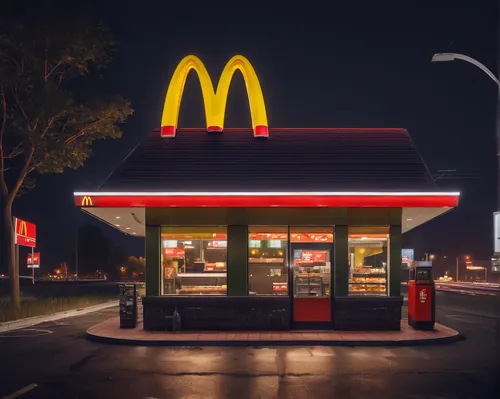


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Importing Libraries
   </p>
</div>


In [280]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow nltk wordcloud textblob gensim

import nltk
nltk.download('stopwords')
from newspaper import Article

import requests
import pandas as pd
import numpy as np
import re, string, nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
stopwords = list(nltk.corpus.stopwords.words('english'))
import matplotlib.pyplot as plt

# Download required NLTK data

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [276]:
# Load the dataset
data = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin1')

In [278]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [70]:
data.shape

(33396, 10)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       This dataset contains over 33,000 anonymized reviews of McDonald's stores in the United States, scraped from Google reviews. It provides valuable insights into customer experiences and opinions about various McDonald's locations across the country. The dataset includes information such as store names, categories, addresses, geographic coordinates, review ratings, review texts, and timestamps.
   </p>
</div>


In [74]:
data.describe()

,reviewer_id,latitude,longitude
count,33396.000000,32736.000000,32736.000000
mean,16698.500000,34.442546,-90.647033
std,9640.739131,5.344116,16.594844
min,1.000000,25.790295,-121.995421
25%,8349.750000,28.655350,-97.792874
50%,16698.500000,33.931261,-81.471414
75%,25047.250000,40.727401,-75.399919
max,33396.000000,44.981410,-73.459820


In [76]:
### Checking the Null Values

data.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [78]:
# Check for any duplicates

has_duplicates = data.duplicated().any()

print(has_duplicates)

False


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       TEXT Preprocessing
   </p>
</div>


In [81]:
# Clean the 'rating' column to keep only the number

data['rating'] = data['rating'].str.extract(r'(\d+)').astype(int)

In [83]:
data['rating'].head()

0    1
1    4
2    1
3    5
4    1
Name: rating, dtype: int64

In [85]:
# Drop Nan Values

data=data.dropna()

In [87]:
# Drop the specified columns

columns_to_drop = ['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ', 'longitude', 'rating_count', 'review_time']

data = data.drop(columns=columns_to_drop)

In [89]:
data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [91]:
X = data['review']

y = data['rating']

In [93]:
messages=X.copy()

In [95]:
messages.head()

0    Why does it look like someone spit on my food?...
1    It'd McDonalds. It is what it is as far as the...
2    Made a mobile order got to the speaker and che...
3    My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4    I repeat my order 3 times in the drive thru, a...
Name: review, dtype: object

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      CORPUS CREATION 
</div>


In [97]:
from nltk.stem import WordNetLemmatizer

import re

from nltk.corpus import stopwords



# Initialize the WordNet Lemmatizer

lemmatizer = WordNetLemmatizer()

# Define a function to remove emojis

def remove_emojis(text):

    emoji_pattern = re.compile(

        "["

        u"\U0001F600-\U0001F64F"  # Emoticons

        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs

        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols

        u"\U0001F700-\U0001F77F"  # Alchemical Symbols

        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended

        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C

        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs

        u"\U0001FA00-\U0001FA6F"  # Chess Symbols

        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A

        u"\U00002702-\U000027B0"  # Dingbats

        u"\U000024C2-\U0001F251"  # Enclosed Characters

        "]+",

        flags=re.UNICODE,

    )

    return emoji_pattern.sub(r'', text)



corpus = []

for i in range(len(messages)):

    # Remove emojis

    review = remove_emojis(messages.iloc[i])  # Use .iloc to access rows by position

    # Remove non-alphabetic characters and convert to lowercase

    review = re.sub('[^a-zA-Z]', ' ', review)

    review = review.lower()

    review = review.split()

    # Lemmatization

    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]

    review = ' '.join(review)

    corpus.append(review)


In [103]:
corpus

['look like someone spit food normal transaction everyone chill polite dont want eat im trying think milky white clear substance food sure coming back',
 'mcdonalds far food atmosphere go staff make difference friendly accommodating always smiling make pleasant experience many fast food place',
 'made mobile order got speaker checked line moving leave otherwise late work never got refund app called said could get money back person stuck system went person next day manager told',
 'mc crispy chicken sandwich customer service quick p',
 'repeat order time drive thru still manage mess suppose large meal double filet fish large fry cheese wrong either need pay close attention order made understand english need work drive thru',
 'work door dash locked u wait long line reason tried beg open door dash refused covid get new job',
 'could give location zero customer service would pulled drive placed simple order order regular hamburg cooky paid pulled window pick told pull space sat sat minute

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
      Exploratory Data Analysis(EDA)  
   </p>
</div>


In [115]:
# Tokenization and Word Frequency Analysis

all_words = ' '.join(corpus)  # Join all reviews into a single string

tokens = word_tokenize(all_words)  # Tokenize into individual words

freq_dist = FreqDist(tokens)  # Calculate frequency distribution

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Count of Ratings
   </p>
</div>


/var/folders/gq/sxzjvrb13q1976s9q3n73b9m0000gn/T/ipykernel_7842/1339265332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=data, palette=custom_palette)
/var/folders/gq/sxzjvrb13q1976s9q3n73b9m0000gn/T/ipykernel_7842/1339265332.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


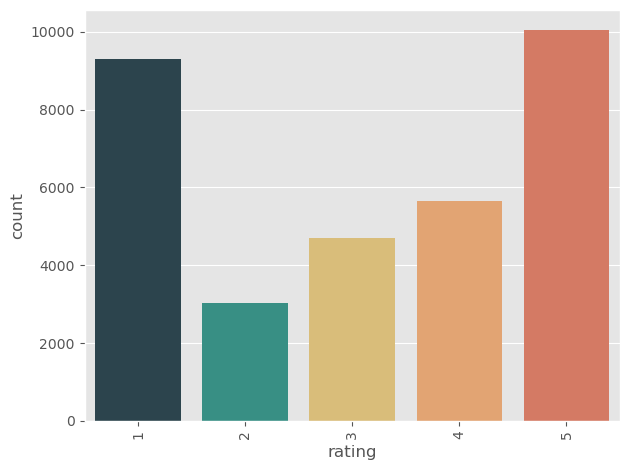

In [118]:
custom_palette = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]

ax = sns.countplot(x="rating", data=data, palette=custom_palette)

# Rotate the x-axis labels to 90 degrees

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Word Cloud with mcdonanld and no word limit
   </p>
</div>


from matplotlib.colors import LinearSegmentedColormap



# Custom color map

colors = LinearSegmentedColormap.from_list("custom_colors", ["#ff6f61", "#ffcc5c", "#88d8b0", "#6b5b95"])



# Generate Word Cloud

wordcloud = WordCloud(

    width=1000,

    height=600,

    background_color='white',

    colormap=colors,

    contour_color='steelblue',

    contour_width=3

).generate(all_words)



# Display Word Cloud

plt.figure(figsize=(12, 8))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('Enhanced Word Cloud of Reviews', fontsize=20, color='darkblue')

plt.show()

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       20 most frequently occurring words (excluding McDonalds), first iteration
   </p>
</div>


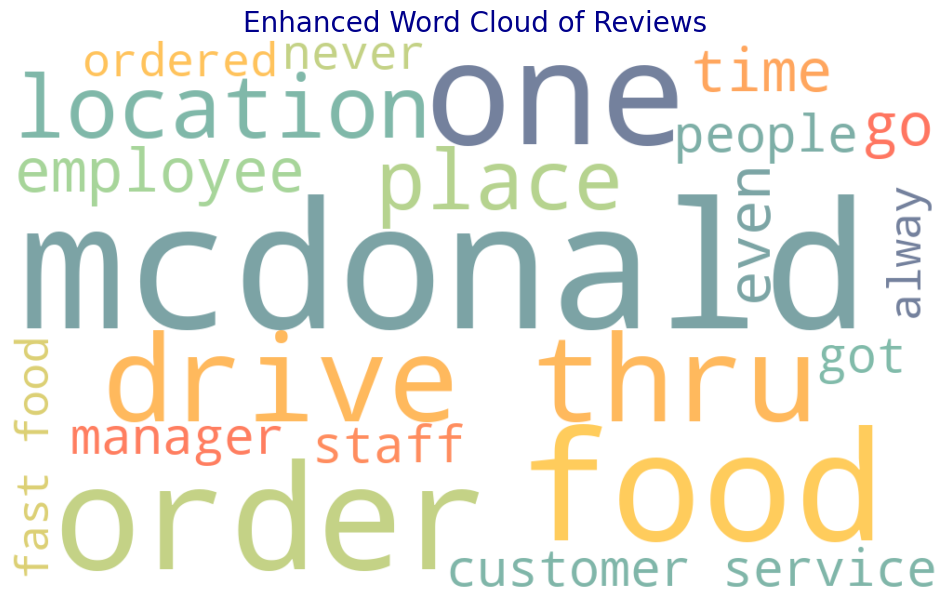

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom color map

colors = LinearSegmentedColormap.from_list("custom_colors", ["#ff6f61", "#ffcc5c", "#88d8b0", "#6b5b95"])

# Word to eliminate

excluded_words = {"mc donald", "go", "mcdonald"}


# Filter out the word to exclude
filtered_words = ' '.join(word for word in all_words.split() if word.lower() != word_to_exclude.lower())

# Generate Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap=colors,
    contour_color='steelblue',
    contour_width=3,
    max_words=20  # Limit to 20 words
).generate(filtered_words)

# Display Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Enhanced Word Cloud of Reviews', fontsize=20, color='darkblue')
plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        20 most frequently occurring words (excluding McDonalds), second iteration
   </p>
</div>


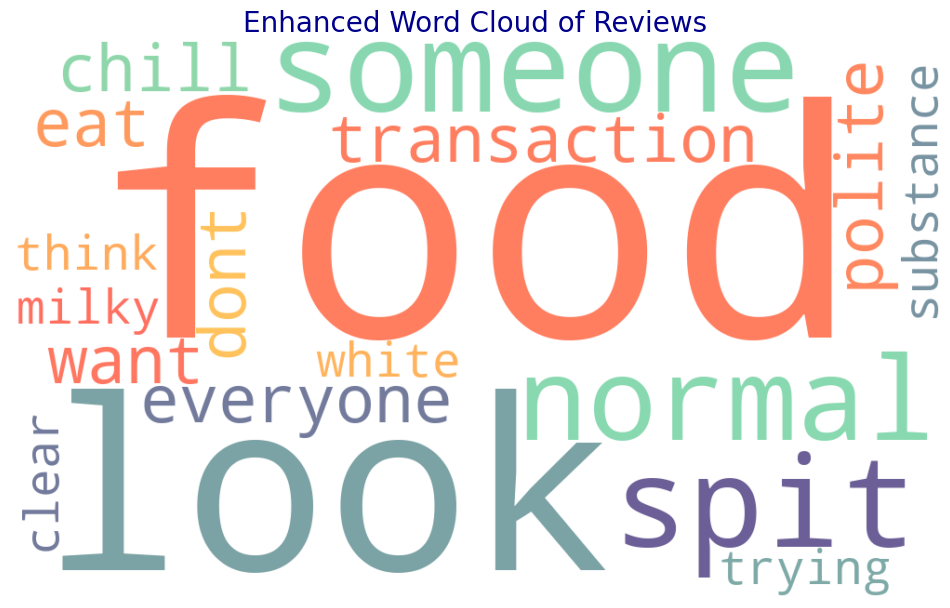

In [185]:

from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Words to exclude (case-insensitive)
excluded_words = {"mc donald", "mcdonald" , "im" }
excluded_words = {word.lower() for word in excluded_words}

# Split words, filter excluded, and limit to 20 unique words
word_list = [word.lower() for word in all_words.split() if word.lower() not in excluded_words]
filtered_text = " ".join(word_list[:20])

# Custom color map
colors = LinearSegmentedColormap.from_list("custom_colors", ["#ff6f61", "#ffcc5c", "#88d8b0", "#6b5b95"])

# Generate Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap=colors,
    contour_color='steelblue',
    contour_width=3
).generate(filtered_text)

# Display Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Enhanced Word Cloud of Reviews', fontsize=20, color='darkblue')
plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
         Creating N - Gram
   </p>
</div>


In [130]:
from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer(ngram_range=(1,1))
cv_matrix = cv.fit_transform(corpus)
cv_matrix


cv_matrix = cv_matrix.toarray()
# get all unique words in the corpus
vocab = cv.get_feature_names_out()

# show document feature vectors / BOW representation using Document Term Matrix(DTM)
print("Document Term Matrix")
pd.DataFrame(cv_matrix, columns=vocab)

Document Term Matrix


,aa,aaa,aaaah,aaand,aak,aarp,aau,ab,abandoned,abc,...,yummy,yup,yvette,yyyyy,zacharine,zari,zero,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        second iteration to remove the irrelevant words
   </p>
</div>


In [203]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the corpus
corpus = ["This is an example sentence.", "Another sample text with words."]

# Words to exclude
excluded_words = [ "aaa", "aaaah", "aaand", "aak", "aarp", "aau", "an", "is" , "this" , "with"] 

# Initialize CountVectorizer with stop words
cv = CountVectorizer(ngram_range=(1, 1), stop_words=excluded_words)

# Get bag of words features in sparse format
cv_matrix = cv.fit_transform(corpus)

# Convert sparse matrix to array
cv_matrix = cv_matrix.toarray()

# Get all unique words in the corpus after filtering
vocab = cv.get_feature_names_out()

# Show document feature vectors / BOW representation using Document Term Matrix (DTM)
print("Document Term Matrix")
print(pd.DataFrame(cv_matrix, columns=vocab))


Document Term Matrix
   another  example  sample  sentence  text  words
0        0        1       0         1     0      0
1        1        0       1         0     1      1



<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       Creating BI-Gram
   </p>
</div>


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer(ngram_range=(2,2))
cv_matrix = cv.fit_transform(corpus)
cv_matrix


cv_matrix = cv_matrix.toarray()
# get all unique words in the corpus
vocab = cv.get_feature_names_out()

# show document feature vectors / BOW representation using Document Term Matrix(DTM)
print("Document Term Matrix")
pd.DataFrame(cv_matrix, columns=vocab)

Document Term Matrix


,aa bit,aaaah wait,aaand oh,aak fry,aarp ppl,aarp special,aau basketball,abandoned active,abandoned order,abc towing,...,zoo skate,zoo staff,zoo theme,zoo themed,zoo think,zoo trip,zoo twist,zoo went,zoo wreck,zoo zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       Creating Tri -Gram 
   </p>
</div>


In [134]:
from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer(ngram_range=(3,3))
cv_matrix = cv.fit_transform(corpus)
cv_matrix


cv_matrix = cv_matrix.toarray()
# get all unique words in the corpus
vocab = cv.get_feature_names_out()

# show document feature vectors / BOW representation using Document Term Matrix(DTM)
print("Document Term Matrix")
pd.DataFrame(cv_matrix, columns=vocab)

Document Term Matrix


,aa bit ccleaner,aaaah wait coke,aaand oh goodness,aak fry cant,aarp ppl use,aarp special manager,aau basketball game,abandoned active hand,abandoned order area,abc towing boot,...,zoo themed life,zoo themed mcdonald,zoo themed perfect,zoo think cheaper,zoo trip anymore,zoo trip kid,zoo twist reading,zoo went found,zoo wreck waiting,zoo zoo theme
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        TF IDF Matrix
   </p>
</div>


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


stop_words = stopwords.words('english')

transformer = TfidfVectorizer(norm = None, stop_words=stop_words)
cv_matrix = transformer.fit_transform(corpus).todense()
cv_matrix

import pandas as pd
vocab = transformer.get_feature_names_out()
print("TF-IDF")
pd.DataFrame(cv_matrix,  columns=vocab)

TF-IDF


,aa,aaa,aaaah,aaand,aak,aarp,aau,ab,abandoned,abc,...,yummy,yup,yvette,yyyyy,zacharine,zari,zero,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       second iteration for TF/IDF
   </p>
</div>


In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd

# Define corpus
corpus = ["This is a sample document.", "Another example with text content."]

# Get English stop words and add custom words to exclude
stop_words = stopwords.words('english')

# Add 10 additional words to exclude
custom_stop_words = ['aa', 'aaa', 'aaaah', 'aaand', 'aak', 
                      'aarp', 'aau', 'abc', 'yvette', 'yyyyy']
stop_words.extend(custom_stop_words)

# Apply TF-IDF transformation with custom stop words
transformer = TfidfVectorizer(norm=None, stop_words=stop_words)
cv_matrix = transformer.fit_transform(corpus).todense()

# Extract vocabulary
vocab = transformer.get_feature_names_out()

# Display TF-IDF matrix as DataFrame
print("TF-IDF")
print(pd.DataFrame(cv_matrix, columns=vocab))


TF-IDF
    another   content  document   example    sample      text
0  0.000000  0.000000  1.405465  0.000000  1.405465  0.000000
1  1.405465  1.405465  0.000000  1.405465  0.000000  1.405465



<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Word Length Distribution
   </p>
</div>


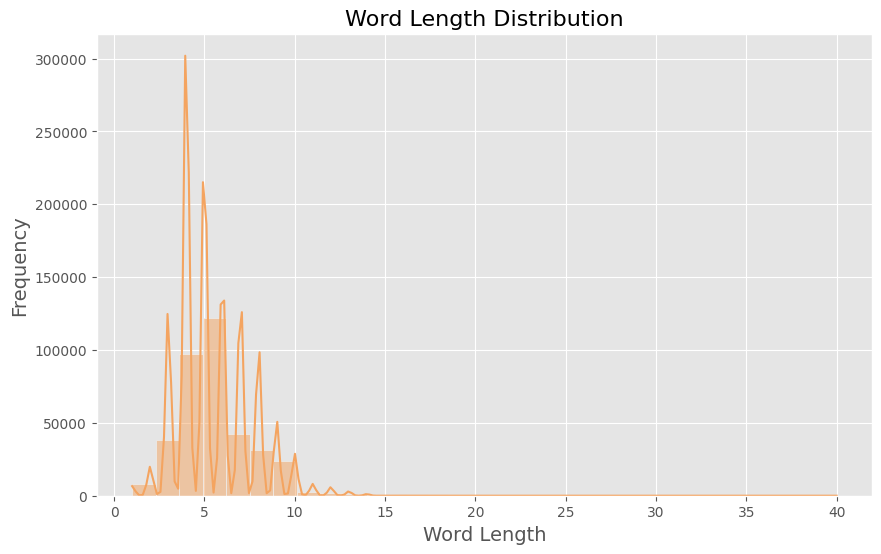

In [24]:
word_lengths = [len(word) for word in tokens]



plt.figure(figsize=(10, 6))

sns.histplot(word_lengths, bins=30, kde=True, color = "sandybrown")

plt.title('Word Length Distribution', fontsize=16)

plt.xlabel('Word Length', fontsize=14)

plt.ylabel('Frequency', fontsize=14)

plt.grid(True)



plt.show()

 
<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Analysis of text structure (paragraph lengths) within reviews   </p>
</div>


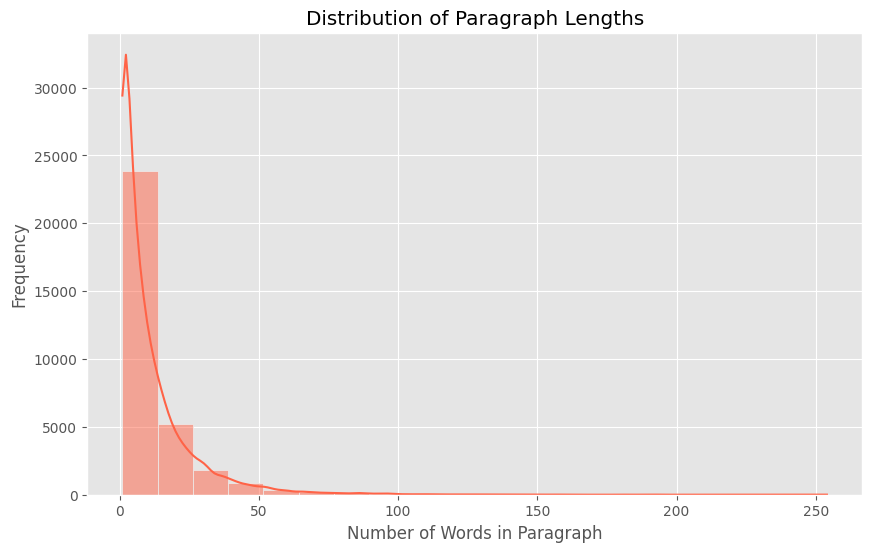

In [26]:
paragraph_lengths = [len(paragraph.split()) for review in corpus for paragraph in review.split('\n') if paragraph.strip()]



plt.figure(figsize=(10, 6))

sns.histplot(paragraph_lengths, bins=20, kde=True, color="tomato")

plt.title('Distribution of Paragraph Lengths')

plt.xlabel('Number of Words in Paragraph')

plt.ylabel('Frequency')

plt.show()

# 
<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Unique Words per Review
        </p>
</div>


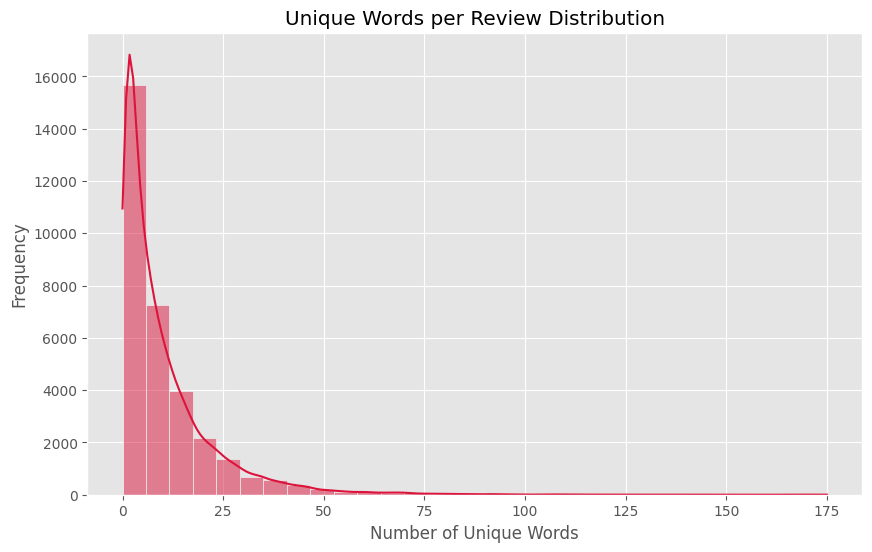

In [27]:
unique_words_per_review = [len(set(review.split())) for review in corpus]



plt.figure(figsize=(10, 6))

sns.histplot(unique_words_per_review, bins=30, kde=True, color="crimson")

plt.title('Unique Words per Review Distribution')

plt.xlabel('Number of Unique Words')

plt.ylabel('Frequency')

plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
     Common Stopwords
        </p>
</div>

/var/folders/gq/sxzjvrb13q1976s9q3n73b9m0000gn/T/ipykernel_7842/647585818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, _ in stopword_count.most_common(20)],
/var/folders/gq/sxzjvrb13q1976s9q3n73b9m0000gn/T/ipykernel_7842/647585818.py:13: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=[word for word, _ in stopword_count.most_common(20)],


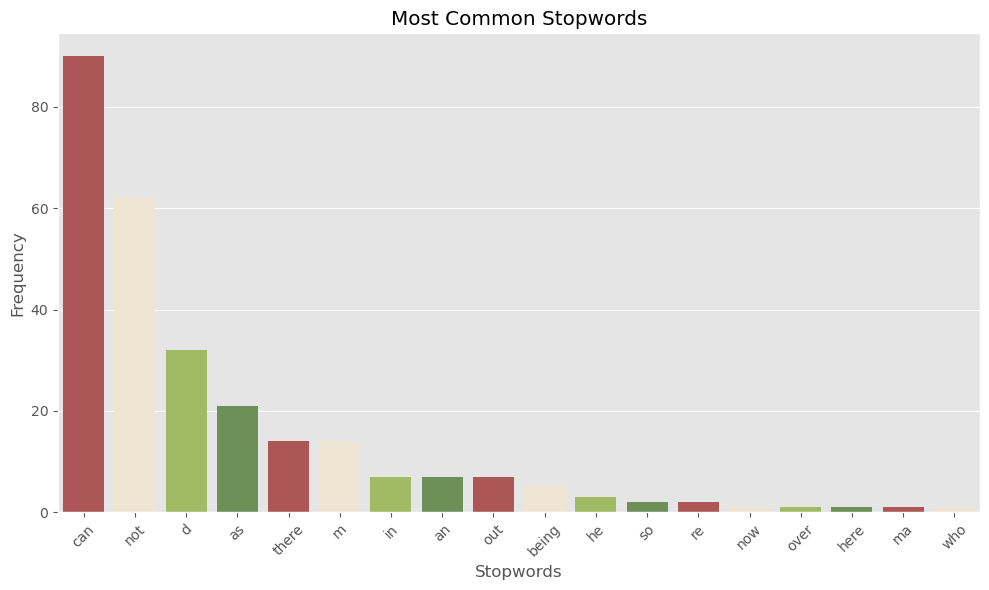

In [266]:
stop_words = set(stopwords.words('english'))

stopword_count = Counter(word for word in tokens if word in stop_words)



custom_palette = ['#bc4749', '#f2e8cf', '#a7c957', '#6a994e']



plt.figure(figsize=(10, 6))

sns.barplot(x=[word for word, _ in stopword_count.most_common(20)],

            y=[count for _, count in stopword_count.most_common(20)],

            palette=custom_palette)

plt.title('Most Common Stopwords')

plt.xlabel('Stopwords')

plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# 
<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
     Analysis of Sentences with Negation
        </p>
</div>

In [36]:
# Example: Identify sentences with negations

sentences_with_negations = [sent for review in corpus for sent in nltk.sent_tokenize(review) if 'not ' in sent]



# Print some examples of sentences with negations

print("Examples of sentences with negations:")

for idx, sent in enumerate(sentences_with_negations[:5]):

    print(f"{idx+1}. {sent}")

Examples of sentences with negations:
1. mmmm honest pretty fast drive order cannot complain run special item frappuccinos pretty fast overall food quality pretty much always fresh
2. almost always use drive thru english first language born new york city said numerous time unable understand person booth cannot understand sometimes faulty intercom issue often someone booth understand speak english properly highly frustrating repeat order much six time yeah said six time last weekend indian kid could life understand could understand polite enough kid reached booth seriously frustrating experience time someone speak language properly close facsimile lol distracted phone finally reach booth pay often usually female lol cashier thumbing phone mcdonald need set standard people work drive thru face face cashier language issue easier deal put people drive intercom way food fine issue end lol work mickey
3. system screen order without speak employee incredible save long line made come language 

### 
<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
     Contextual Word Usage (Concordance)
        </p>
</div>

In [37]:
from nltk.text import Text



# Convert corpus into NLTK Text object

text = Text(tokens)



# Print concordance for a specific word (e.g., 'good')

print("Concordance for 'good':")

text.concordance('good', lines=10)

Concordance for 'good':
Displaying 10 of 5504 matches:
d would recomend location hit pretty good beginning everything great last long
rience review low order order create good business giving people exceptional e
issing meal normally location pretty good last night absolutely ridiculous sat
y get better fast food place anymore good quick drive service long line went q
 service better food hey go kid love good customer service guy make difference
even coming drive take half hour get good lot people behind got food one cared
 pony tail read previous review thry good need check going never would come ba
g hard earned money customer service good staff play game pay money see horsin
ite addressed fry kinda cold another good place get food affordable price alri
m error bit smaller location overall good place grab quick bite near lake cree


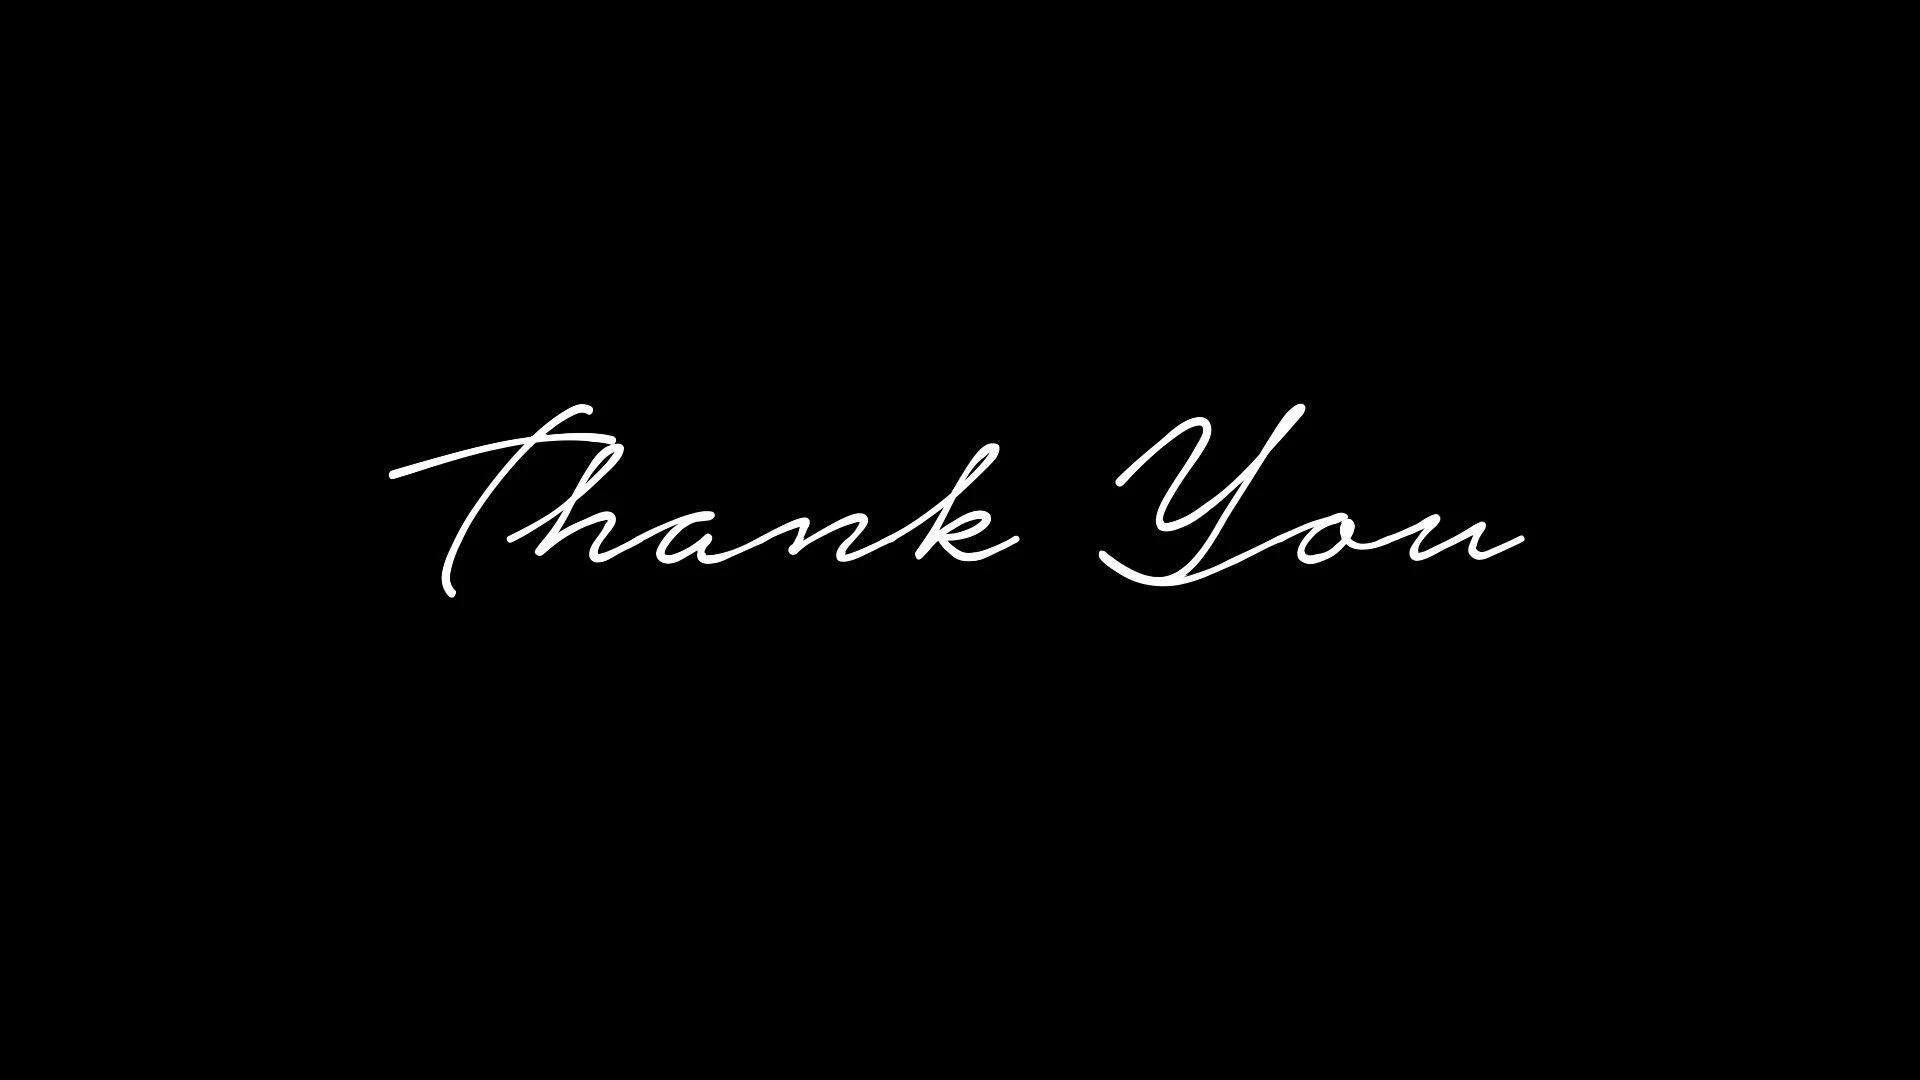